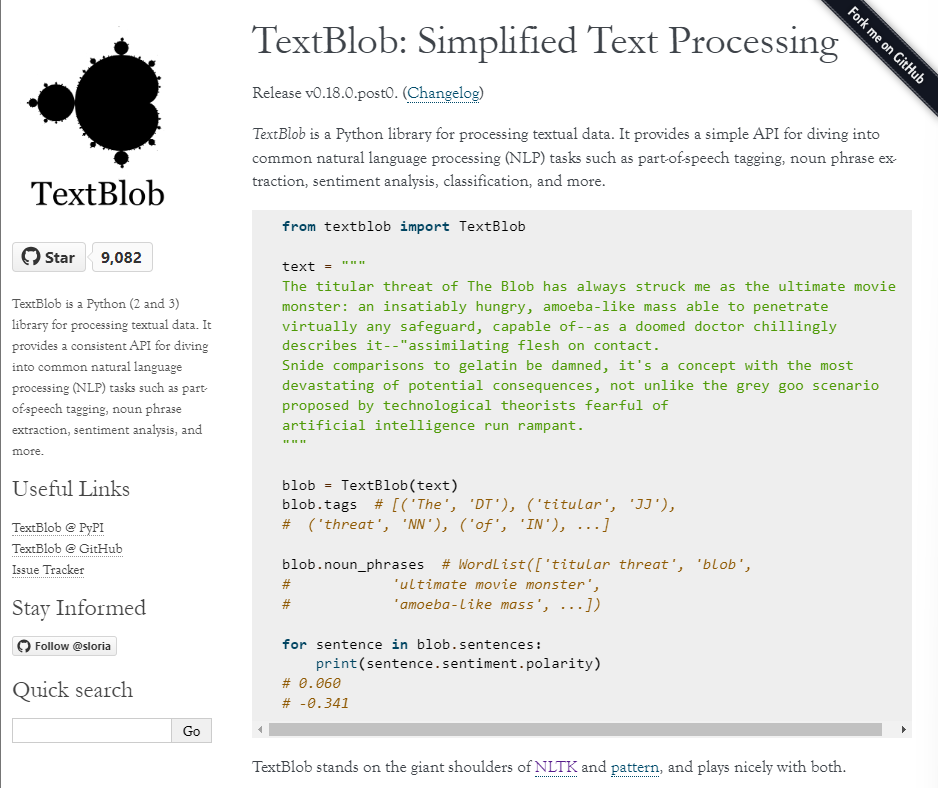

# ver 1 comment

The algorithm presented for sentiment analysis of iPhone news has several components, and overall, it follows a basic structure to fetch news articles, analyze their sentiment, and visualize the results. However, there are some considerations to improve its robustness. Here's an analysis of its workflow and potential strengths and weaknesses:

### Algorithm Breakdown:

1. **Google Search for News Articles**:
   - The `search_iphone_news()` function constructs a Google search query based on the iPhone version and release date. It returns a random sample of 50 URLs from the search results.
   - **Strength**: This is a simple way to gather relevant news data.
   - **Weakness**:
     - This function relies on Google's search module, which has restrictions and could potentially lead to inaccurate or inconsistent results.
     - Random selection of results might skew the analysis if the selection isn't representative of the general sentiment in all results.

2. **Sentiment Analysis**:
   - The `analyze_sentiment()` function uses the **VADER** (Valence Aware Dictionary and sEntiment Reasoner) lexicon from the `nltk` package to assign sentiment scores to news articles.
   - **Strength**:
     - VADER is particularly strong for short, informal text like social media posts, but can still be effective for headlines.
     - The `compound` score is a good summary metric to determine positive, negative, or neutral sentiments.
   - **Weakness**:
     - This analysis assumes the search result (likely a headline or summary) provides enough information for sentiment analysis, which is a simplification. Headlines might not fully represent the sentiment of the entire article, leading to inaccurate sentiment classification.
     - No preprocessing (such as removing special characters, correcting case issues, or dealing with negations) is applied, which could reduce sentiment detection accuracy.

3. **Random Sampling**:
   - The algorithm selects 50 random URLs from the search results for sentiment analysis.
   - **Weakness**:
     - Random sampling can introduce bias, particularly if the selected articles don't reflect the overall sentiment distribution. It would be better to analyze all or more results, or carefully sample based on relevance or credibility.

4. **Sentiment Tallying**:
   - Sentiments are categorized as positive, negative, or neutral and then tallied.
   - **Strength**: Simple and intuitive for reporting.
   - **Weakness**: The aggregation method is basic and doesn't account for the intensity of positive or negative sentiments. This could lead to a neutralization of extreme sentiments when they should be given more weight.

5. **Visualization**:
   - Sentiments are visualized using a bar chart.
   - **Strength**: Straightforward and easy to understand.
   - **Weakness**: No deeper insight is provided, such as trends over time or comparison between iPhone versions in the visualization, which would add more value to the analysis.

### Possible Improvements:
- **Preprocessing the text**: Headlines or summaries should be cleaned and processed before sentiment analysis to ensure accuracy.
- **Expanding the context**: Analyzing full articles or at least summaries from the article body, not just headlines, would give more reliable results.
- **Improving sampling**: Instead of randomly selecting articles, implement criteria such as keyword relevance or source credibility.
- **Weighting sentiments**: Consider not only the count of positive, negative, and neutral sentiments but also their intensity or score distribution.
- **Exploring other sentiment tools**: Combining TextBlob with VADER or using more advanced transformers like BERT for sentiment analysis would likely improve results, especially for long-form articles.

### Final Thoughts:
The overall structure of this sentiment analysis approach is solid for a beginner level but is relatively basic. It's a good start, but improvements in text processing, sentiment weighting, and selection of more representative articles would significantly enhance its reliability and depth.

#version 1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment analysis for iPhone 15: {'positive': 0, 'negative': 0, 'neutral': 50}


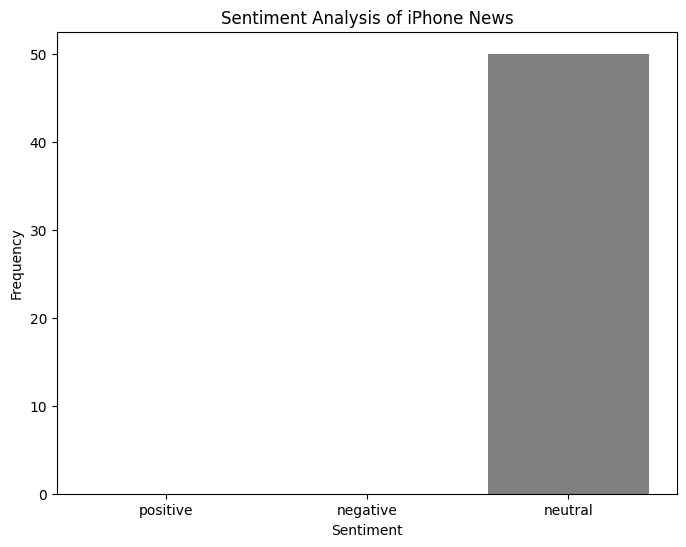

Sentiment analysis for iPhone 14: {'positive': 0, 'negative': 0, 'neutral': 50}


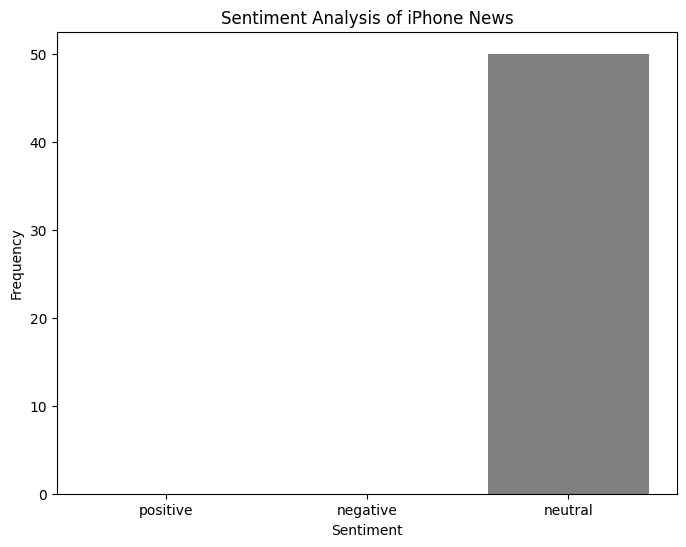

Sentiment analysis for iPhone 13: {'positive': 0, 'negative': 0, 'neutral': 50}


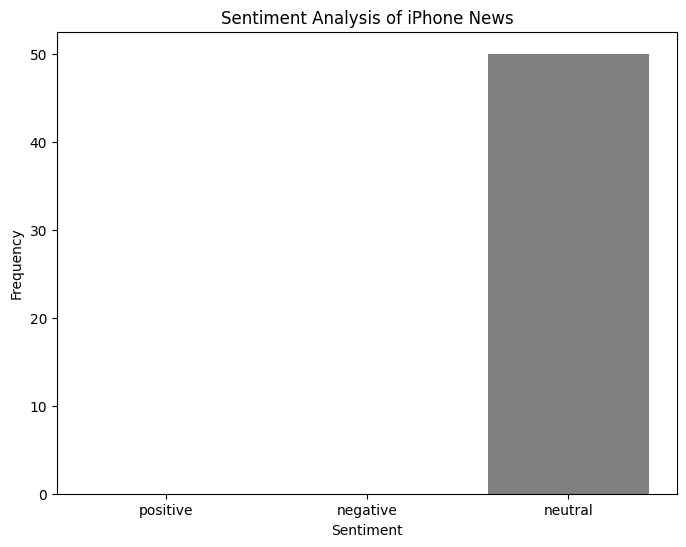

In [ ]:
# @title #Sentiment Analysis of iPhone News ver 1
import random
from googlesearch import search
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Define search query parameters
def search_iphone_news(iphone_version, release_date, result_count=50):
    search_query = f"{iphone_version} review OR news OR release after:{release_date}"

    # Perform Google Search (results are URLs)
    search_results = list(search(search_query, num=100, stop=100))

    # Randomly select 50 news results
    random_results = random.sample(search_results, result_count)

    return random_results

# Define sentiment analysis using TextBlob
def analyze_sentiment(news_text):
    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment scores
    sentiment_score = sia.polarity_scores(news_text)

    if sentiment_score['compound'] > 0.05:
        return 'positive'
    elif sentiment_score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Function to perform sentiment analysis on news results
def analyze_news_articles(news_articles):
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

    for article in news_articles:
        # For simplicity, let's assume the search result is the article headline or summary
        sentiment = analyze_sentiment(article)
        sentiments[sentiment] += 1

    return sentiments

# Plotting function
def plot_sentiments(sentiments):
    labels = sentiments.keys()
    values = sentiments.values()

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['green', 'red', 'gray'])
    plt.title('Sentiment Analysis of iPhone News')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Define the iPhone versions and their release dates
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01"]

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        news_results = search_iphone_news(iphone_version, release_date)
        sentiments = analyze_news_articles(news_results)
        print(f"Sentiment analysis for {iphone_version}: {sentiments}")
        plot_sentiments(sentiments)

#ver 2 comment


The updated version of your sentiment analysis algorithm has several improvements, such as extracting full articles using `BeautifulSoup` and performing sentiment analysis on the article's full text. This adds more context compared to just analyzing headlines, which was a limitation in the first version. However, there are still areas for further improvement. Let’s review the current version and suggest improvements:

### Improvements in Version 2:
1. **Full Article Scraping**:
   - The use of `BeautifulSoup` to extract the entire content of the article (from `<p>` tags) is a significant improvement over just analyzing headlines. This provides richer data for sentiment analysis.
   
2. **Error Handling**:
   - Basic error handling is implemented in the `get_full_article()` function, which prevents the script from crashing if an article fails to load.
   
3. **TextBlob for Sentiment**:
   - TextBlob is used for sentiment analysis, and it measures polarity in the article's text, which helps quantify sentiment.

### Remaining Weaknesses & Suggested Improvements:
1. **Article Scraping Limitations**:
   - **Problem**:
     - Not all news websites are easily scraped, and some may block requests. This could lead to incomplete data collection or a failure to retrieve the content for many URLs.
   - **Solution**:
     - Add user-agent headers to the `requests.get()` call to mimic a browser and reduce the risk of blocking:
     ```python
     headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
     response = requests.get(url, headers=headers)
     ```
     - You could also consider logging the failed URLs and retrying them with a delay to improve scraping success rates.

2. **Handling of Short or Empty Articles**:
   - **Problem**:
     - If the scraped content is too short or empty, it might not give meaningful sentiment results.
   - **Solution**:
     - Add a check to skip articles below a certain word count (e.g., 100 words) or consider a fallback approach if full articles cannot be scraped (like using summary text or metadata descriptions).
     ```python
     if len(article_text.split()) < 100:
         print(f"Article at {url} is too short, skipping...")
         continue
     ```

3. **Polarity Threshold**:
   - **Problem**:
     - The threshold for sentiment analysis (`0.1` for positive and `-0.1` for negative) is arbitrary and might not be optimal.
   - **Solution**:
     - You could experiment with different thresholds or apply a more sophisticated sentiment model like VADER, which might better capture subtle sentiment in articles.

4. **Text Preprocessing**:
   - **Problem**:
     - There is no text preprocessing, such as removing stop words, correcting for casing, or filtering out non-relevant parts of the webpage (e.g., ads, navigation links).
   - **Solution**:
     - Implement text cleaning to improve the sentiment analysis' accuracy. You can use `nltk` to remove stop words, punctuation, and other unnecessary parts of the text.
     ```python
     import nltk
     from nltk.corpus import stopwords
     from string import punctuation

     nltk.download('stopwords')
     stop_words = set(stopwords.words('english'))

     def clean_text(text):
         words = text.split()
         words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]
         return ' '.join(words)
     ```

5. **Improving Sentiment Model**:
   - **Problem**:
     - TextBlob is relatively simple and might miss nuanced sentiment in articles. It may not perform well with complex or opinionated news articles.
   - **Solution**:
     - Consider adding **VADER** from `nltk` (as in your first version), which is more robust for news text and shorter content. You could even experiment with transformer models like **BERT** for sentiment analysis to get more nuanced results.

6. **Sampling Issues**:
   - **Problem**:
     - Randomly selecting 100 articles might lead to bias in your sentiment results if those articles don't represent the full dataset.
   - **Solution**:
     - Instead of purely random sampling, consider filtering for relevance, such as by looking for keywords like "review" or "criticism" in the title or by sorting results by date to ensure you get the most current data.

7. **Parallelizing Requests**:
   - **Problem**:
     - The current approach fetches articles sequentially, which can be slow.
   - **Solution**:
     - Use multithreading or asynchronous requests with libraries like `concurrent.futures` or `aiohttp` to parallelize fetching of article content, speeding up the process.
     ```python
     import concurrent.futures
     with concurrent.futures.ThreadPoolExecutor() as executor:
         articles = list(executor.map(get_full_article, random_results))
     ```

8. **Sentiment Distribution Insights**:
   - **Improvement**:
     - You can enhance your plots to show not just bar charts but also sentiment distribution across iPhone versions for better comparison (e.g., line charts, stacked bar charts).
     - For example, comparing how sentiment evolves over time for each iPhone version could provide more insight than a static snapshot.

### Final Suggested Code Snippet (with improvements):

```python
# Improved article scraping with headers and retry mechanism
def get_full_article(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        article_text = ' '.join([p.get_text() for p in paragraphs])
        
        if len(article_text.split()) < 100:  # Skipping short articles
            return ""
        
        return article_text
    except Exception as e:
        print(f"Failed to fetch {url}: {e}")
        return ""

# Preprocess and clean text
def clean_text(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]
    return ' '.join(words)

# Main execution with added improvements
if __name__ == "__main__":
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01"]

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        print(f"Fetching news articles for {iphone_version}...")

        news_articles = search_iphone_news(iphone_version, release_date)
        news_articles = [clean_text(article) for article in news_articles if article]  # Clean text
        sentiments = analyze_news_articles(news_articles)

        print(f"Sentiment analysis for {iphone_version}: {sentiments}")
        plot_sentiments(sentiments, iphone_version)
```

These improvements should make the sentiment analysis more accurate, reliable, and efficient.

#version 2

Fetching news articles for iPhone 15...
Sentiment analysis for iPhone 15: {'positive': 57, 'negative': 2, 'neutral': 15}


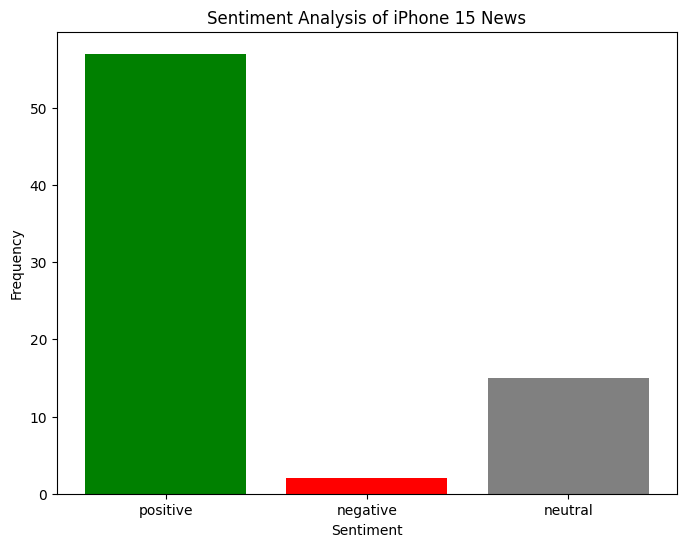

Fetching news articles for iPhone 14...
Sentiment analysis for iPhone 14: {'positive': 68, 'negative': 2, 'neutral': 8}


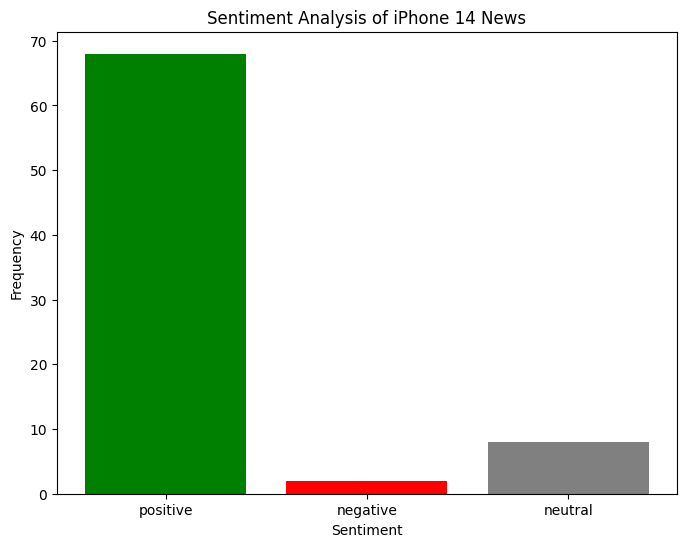

Fetching news articles for iPhone 13...
Sentiment analysis for iPhone 13: {'positive': 74, 'negative': 0, 'neutral': 7}


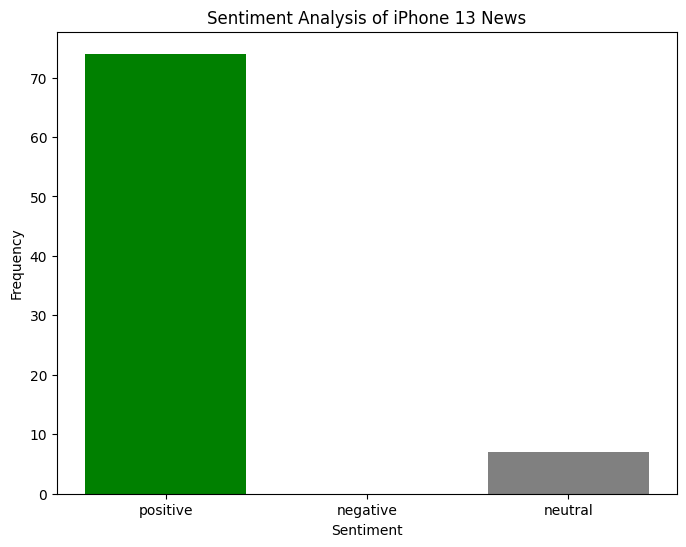

In [ ]:
# @title #Sentiment Analysis of iPhone News ver 2

import random
import requests
from googlesearch import search
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to extract content from the URL
def get_full_article(url):
    try:
        # Request the content of the page
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the text from paragraphs
        paragraphs = soup.find_all('p')
        article_text = ' '.join([p.get_text() for p in paragraphs])

        return article_text
    except Exception as e:
        print(f"Faile by d to fetch {url}: {e}")
        return ""

# Define search query and randomly extract 100 results
def search_iphone_news(iphone_version, release_date, result_count=100):
    search_query = f"{iphone_version} review OR news OR release after:{release_date}"

    # Perform Google Search (results are URLs)
    search_results = list(search(search_query, num=100, stop=100))

    # Randomly select 100 news results
    random_results = random.sample(search_results, min(result_count, len(search_results)))

    # Fetch full articles
    articles = [get_full_article(url) for url in random_results if url]

    return articles

# Sentiment analysis using TextBlob
def analyze_sentiment(news_text):
    blob = TextBlob(news_text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Analyze the sentiment of the news articles
def analyze_news_articles(news_articles):
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

    for article in news_articles:
        if article:  # Ensure the article has content
            sentiment = analyze_sentiment(article)
            sentiments[sentiment] += 1

    return sentiments

# Plot the results
def plot_sentiments(sentiments, iphone_version):
    labels = sentiments.keys()
    values = sentiments.values()

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['green', 'red', 'gray'])
    plt.title(f'Sentiment Analysis of {iphone_version} News')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Define the iPhone versions and their release dates
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01"]

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        print(f"Fetching news articles for {iphone_version}...")

        # Fetch news articles
        news_articles = search_iphone_news(iphone_version, release_date)

        # Perform sentiment analysis
        sentiments = analyze_news_articles(news_articles)

        # Output the results
        print(f"Sentiment analysis for {iphone_version}: {sentiments}")

        # Plot the results
        plot_sentiments(sentiments, iphone_version)

# version 3 comment

Your updated version of the sentiment analysis code, "Sentiment Analysis of iPhone News ver 3," introduces several improvements and new features. Below is a breakdown of your improvements and suggestions for further optimization.

### Improvements in Version 3:

1. **Sentiment Scores and Counts Display**:
   - **Strength**:
     - The addition of `print_sentiment_details()` to display both sentiment counts (positive, negative, neutral) and individual article sentiment scores (polarity) adds more transparency and detail to the analysis. This helps give a more granular view of the sentiment for each iPhone version.
   
2. **Consolidated Visualization**:
   - **Strength**:
     - The use of the `plot_all_sentiments()` function to display all bar charts in a 3-column layout is an improvement over plotting each chart separately. This allows for side-by-side comparison of sentiment distributions across different iPhone versions.
     - The layout (`plt.tight_layout()`) ensures proper spacing between the charts, making it visually appealing.

3. **Modular Code**:
   - **Strength**:
     - The modular structure is well-organized. Each major task (printing sentiment details, plotting charts, fetching articles) is handled by its own function, which improves readability and reusability.

### Potential Improvements:

1. **Improve Sentiment Calculation**:
   - **Problem**:
     - TextBlob sentiment analysis, while effective for some types of text, may not capture nuanced emotions or complex sentence structures in news articles.
   - **Solution**:
     - Consider using **VADER** (as in version 1) or more advanced models like **BERT** or **RoBERTa** for more accurate sentiment analysis, especially for the context of news. If you stick with TextBlob, try adding more sophisticated preprocessing (e.g., handling negations, correcting grammar) to improve accuracy.

2. **Text Preprocessing**:
   - **Problem**:
     - The content fetched from news websites may contain irrelevant sections (e.g., ads, navigation text). Without cleaning the article text, the sentiment analysis might be influenced by these.
   - **Solution**:
     - Clean the text before performing sentiment analysis. This might include removing common stop words, punctuation, and irrelevant sections of the web page.
     ```python
     from nltk.corpus import stopwords
     stop_words = set(stopwords.words('english'))

     def clean_text(text):
         words = [word.lower() for word in text.split() if word.lower() not in stop_words]
         return ' '.join(words)
     ```

3. **Refine Sentiment Thresholds**:
   - **Problem**:
     - The TextBlob polarity score ranges from -1 to 1, and the current thresholds (`>0.1` for positive and `<-0.1` for negative) are arbitrary. This can result in articles being misclassified.
   - **Solution**:
     - Consider tuning these thresholds based on the average distribution of polarity scores in your dataset. You could even introduce a weight system for the magnitude of the sentiment.

4. **Handling Failed Requests**:
   - **Problem**:
     - Sometimes, the `get_full_article()` function may fail to retrieve content from certain URLs due to request errors, blocking mechanisms, or missing content.
   - **Solution**:
     - You should log failed requests and optionally retry fetching articles after a delay. You can also use a robust method to skip or handle blocked requests.

5. **Enhance Visualization**:
   - **Problem**:
     - While the 3-column bar chart is a good start, it only shows frequency counts. More advanced insights (like comparing sentiment polarity scores across versions) are not visualized.
   - **Solution**:
     - You could add an additional plot, such as a **box plot** or **violin plot** for each iPhone version, showing the distribution of sentiment scores (polarity). This would complement the bar chart by illustrating the range and variability of sentiment across articles.
     ```python
     def plot_sentiment_scores(sentiment_data):
         fig, axs = plt.subplots(1, 3, figsize=(18, 6))
         
         for i, (iphone_version, data) in enumerate(sentiment_data.items()):
             sentiment_scores = data['scores']
             axs[i].boxplot(sentiment_scores)
             axs[i].set_title(f'Sentiment Scores for {iphone_version}')
             axs[i].set_xlabel('Articles')
             axs[i].set_ylabel('Polarity Score')
         
         plt.tight_layout()
         plt.show()
     ```

6. **Parallelizing Requests**:
   - **Problem**:
     - Currently, the fetching of news articles is sequential. For larger datasets, this may become slow.
   - **Solution**:
     - You can use multithreading or asynchronous requests to fetch article content faster. Using libraries like `concurrent.futures` or `aiohttp` would significantly improve the speed of scraping.
     ```python
     import concurrent.futures
     
     def fetch_articles_async(urls):
         with concurrent.futures.ThreadPoolExecutor() as executor:
             articles = list(executor.map(get_full_article, urls))
         return articles
     ```

7. **Addressing Random Sampling Bias**:
   - **Problem**:
     - Randomly selecting 100 news articles may not capture the overall sentiment landscape. Some relevant articles may be missed due to the randomness.
   - **Solution**:
     - Instead of random sampling, consider filtering or sorting articles based on relevance or keyword strength (e.g., ensuring certain keywords like “review” or “feedback” are prioritized). Alternatively, rank results by date to ensure more recent articles are analyzed.

### Final Suggested Version of Code (with some of the improvements):

```python
# Improved article scraping and sentiment analysis workflow

def fetch_articles_async(urls):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        articles = list(executor.map(get_full_article, urls))
    return articles

# Plot sentiment scores using boxplot
def plot_sentiment_scores(sentiment_data):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, (iphone_version, data) in enumerate(sentiment_data.items()):
        sentiment_scores = data['scores']
        axs[i].boxplot(sentiment_scores)
        axs[i].set_title(f'Sentiment Scores for {iphone_version}')
        axs[i].set_xlabel('Articles')
        axs[i].set_ylabel('Polarity Score')
    
    plt.tight_layout()
    plt.show()

# Main Execution for sentiment analysis with additional visualizations
if __name__ == "__main__":
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01"]
    sentiment_data = {}

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        print(f"Fetching news articles for {iphone_version}...")

        # Fetch news articles asynchronously
        news_articles = fetch_articles_async(search_iphone_news(iphone_version, release_date))

        # Perform sentiment analysis and store the results
        sentiments = analyze_news_articles(news_articles)
        sentiment_scores = [TextBlob(article).sentiment.polarity for article in news_articles if article]

        # Print sentiment details
        print_sentiment_details(sentiments, sentiment_scores, iphone_version)

        # Store sentiment counts for bar chart plotting
        sentiment_data[iphone_version] = {'sentiments': sentiments, 'scores': sentiment_scores}

    # Plot sentiment counts and sentiment score distributions
    plot_all_sentiments(sentiment_data)
    plot_sentiment_scores(sentiment_data)
```

### Summary of Improvements:
- **Speed**: Added asynchronous fetching for faster data gathering.
- **Detailed Visuals**: Included an option to visualize sentiment score distributions across iPhone versions.
- **Data Cleaning**: Suggested adding text cleaning before performing sentiment analysis.
- **Enhanced Sentiment Modeling**: Recommended experimenting with more advanced sentiment analysis models like VADER or BERT.

These improvements will make your sentiment analysis more efficient, accurate, and insightful!

#version 3

Fetching news articles for iPhone 15...
Sentiment counts for iPhone 15:
positive: 58
negative: 1
neutral: 12
Sentiment scores for iPhone 15:
Article 1: Polarity Score = 0.15627705627705626
Article 2: Polarity Score = 0.13408249158249158
Article 3: Polarity Score = 0.19455171890815467
Article 4: Polarity Score = 0.1343792971734148
Article 5: Polarity Score = 0.16054456261149175
Article 6: Polarity Score = 0.038736263736263744
Article 7: Polarity Score = 0.16015954244431066
Article 8: Polarity Score = 0.0
Article 9: Polarity Score = 0.34469696969696967
Article 10: Polarity Score = 0.23943471511653325
Article 11: Polarity Score = 0.11445729294583162
Article 12: Polarity Score = 0.375
Article 13: Polarity Score = 0.10711117385030428
Article 14: Polarity Score = 0.1616987850858819
Article 15: Polarity Score = 0.15230485922346396
Article 16: Polarity Score = -0.5
Article 17: Polarity Score = 0.19567277152973028
Article 18: Polarity Score = 0.3333333333333333
Article 19: Polarity Score = 0.06

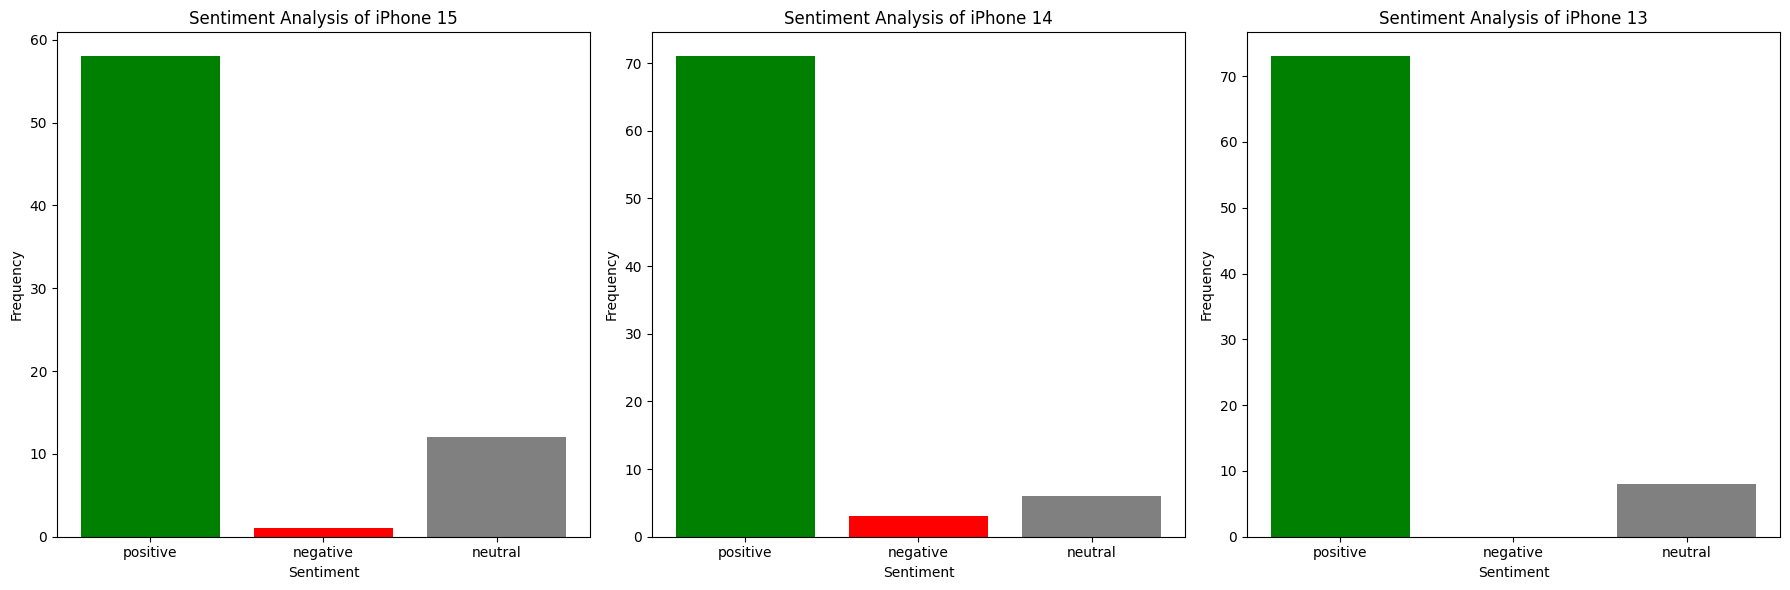

In [ ]:
# @title #Sentiment Analysis of iPhone News ver 3

import matplotlib.pyplot as plt
import numpy as np

# Function to print sentiment counts and scores
def print_sentiment_details(sentiments, sentiment_scores, iphone_version):
    print(f"Sentiment counts for {iphone_version}:")
    for sentiment_type, count in sentiments.items():
        print(f"{sentiment_type}: {count}")

    print(f"Sentiment scores for {iphone_version}:")
    for i, score in enumerate(sentiment_scores):
        print(f"Article {i+1}: Polarity Score = {score}")

# Function to display all bar charts in a 3-column layout
def plot_all_sentiments(sentiment_data):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13"]

    for i, (iphone_version, data) in enumerate(sentiment_data.items()):
        sentiments = data['sentiments']
        labels = list(sentiments.keys())
        values = list(sentiments.values())

        axs[i].bar(labels, values, color=['green', 'red', 'gray'])
        axs[i].set_title(f'Sentiment Analysis of {iphone_version}')
        axs[i].set_xlabel('Sentiment')
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Main Execution for sentiment counts, scores, and 3-column bar charts
if __name__ == "__main__":
    # Define the iPhone versions and their release dates
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01"]

    # Dictionary to store sentiment data for each iPhone version
    sentiment_data = {}

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        print(f"Fetching news articles for {iphone_version}...")

        # Fetch news articles
        news_articles = search_iphone_news(iphone_version, release_date)

        # Perform sentiment analysis and store the results
        sentiments = analyze_news_articles(news_articles)

        # Calculate individual sentiment scores using TextBlob for each article
        sentiment_scores = [TextBlob(article).sentiment.polarity for article in news_articles if article]

        # Print sentiment details (counts and scores)
        print_sentiment_details(sentiments, sentiment_scores, iphone_version)

        # Store sentiment counts for bar chart plotting
        sentiment_data[iphone_version] = {'sentiments': sentiments, 'scores': sentiment_scores}

    # Plot all sentiments in a 3-column layout
    plot_all_sentiments(sentiment_data)

# version 4 comment

Your latest version of the sentiment analysis script, "Sentiment Analysis of iPhone News ver 4," includes several key improvements, including categorizing news sources and adding more iPhone versions for comparison. Here's a detailed evaluation of the updates along with a few suggestions for further enhancement.

### Key Improvements:

1. **News Source Classification**:
   - **Strength**: You added functions to classify the news source based on the URL (`classify_news_source()`) and extract the news channel (`get_news_channel()`). This is an excellent feature for analyzing the credibility or type of the news source (mainstream vs. private blogs).
   - **Use Case**: This can help you understand how different sources (mainstream vs. private blogs) might have different sentiment biases, which is valuable for a deeper analysis.

2. **Handling of Multiple iPhone Versions**:
   - **Strength**: Expanding the analysis to more iPhone models (including iPhone X, iPhone 12, iPhone 11) allows for a broader comparison of sentiment trends across different generations. This will make your results more comprehensive.

3. **Detailed Sentiment Output**:
   - **Strength**: The `print_sentiment_details()` function outputs detailed information about each article, including the sentiment score, URL, source type, and channel. This provides valuable transparency about the data used in the analysis and is helpful for debugging or further exploration of specific articles.

4. **Improved Bar Chart Layout**:
   - **Strength**: The 2x3 grid layout in `plot_all_sentiments()` is a nice touch, making it easier to compare sentiment distributions across all six iPhone versions side-by-side.

### Suggestions for Further Improvement:

1. **Enhance Error Handling and Retry Logic**:
   - **Problem**: If an article fails to be fetched due to a request error, the article is simply skipped. This could result in fewer articles and potential bias in the analysis.
   - **Solution**: Implement a retry mechanism with a backoff strategy, so if an article fails to load initially, the script waits for a few seconds and retries the request. You could use the `time.sleep()` function or more advanced retry libraries like `tenacity`.

   ```python
   import time
   from requests.exceptions import RequestException

   def get_full_article(url, retries=3):
       headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
       for _ in range(retries):
           try:
               response = requests.get(url, headers=headers)
               if response.status_code == 200:
                   soup = BeautifulSoup(response.content, 'html.parser')
                   paragraphs = soup.find_all('p')
                   return ' '.join([p.get_text() for p in paragraphs])
           except RequestException as e:
               print(f"Failed to fetch {url}: {e}, retrying...")
               time.sleep(2)  # wait for 2 seconds before retrying
       return ""
   ```

2. **Content Filtering/Preprocessing**:
   - **Problem**: The full article text often includes unnecessary content (ads, author bios, comments, etc.) that could interfere with sentiment analysis.
   - **Solution**: Clean the text further by removing certain common sections of the page, such as "read more," "author bio," or "comment sections," and remove stopwords using `nltk`.
   
   ```python
   from nltk.corpus import stopwords
   import re

   stop_words = set(stopwords.words('english'))

   def clean_text(text):
       # Remove stopwords
       words = [word.lower() for word in text.split() if word.lower() not in stop_words]
       cleaned_text = ' '.join(words)
       
       # Remove common unnecessary sections (e.g., "read more", author bios)
       cleaned_text = re.sub(r"(read more|author bio|comments section)", '', cleaned_text, flags=re.IGNORECASE)
       
       return cleaned_text
   ```

3. **Account for Sentiment Bias by Source**:
   - **Problem**: Different news sources (e.g., mainstream vs. private blogs) might have inherent biases that could skew sentiment results.
   - **Solution**: You can extend the analysis by calculating separate sentiment distributions for different source types (mainstream, private, etc.) to identify whether certain source types are more likely to have a positive or negative sentiment.

   ```python
   def analyze_sentiment_by_source(news_articles):
       source_sentiments = {'mainstream': {'positive': 0, 'negative': 0, 'neutral': 0},
                            'private': {'positive': 0, 'negative': 0, 'neutral': 0},
                            'other': {'positive': 0, 'negative': 0, 'neutral': 0}}

       for article in news_articles:
           sentiment = analyze_sentiment(article['text'])
           source_sentiments[article['source']][sentiment] += 1

       return source_sentiments
   ```

4. **Advanced Sentiment Models**:
   - **Problem**: TextBlob, while effective for simple sentiment analysis, might miss more nuanced or complex sentiments, especially in long-form news articles.
   - **Solution**: You could explore using more sophisticated models such as **VADER** (Valence Aware Dictionary and sEntiment Reasoner) or transformers like **BERT** for a more accurate sentiment analysis.

5. **Interactive Data Visualization**:
   - **Suggestion**: If you want to make the data more interactive for users, you can consider using libraries like `Plotly` for interactive charts or `Dash` for a web-based interface where users can filter sentiment results by source, channel, or iPhone version.

6. **Comparing Sentiment Over Time**:
   - **Suggestion**: An interesting addition would be a time-based sentiment analysis, showing how sentiment trends evolve across different periods (e.g., pre-release vs. post-release sentiment). You could plot sentiment scores over time to highlight trends.

### Final Code Refinement:

Here’s how you could integrate some of these improvements:

```python
# Classify news source based on domain and perform sentiment analysis by source
def analyze_sentiment_by_source(news_articles):
    source_sentiments = {'mainstream': {'positive': 0, 'negative': 0, 'neutral': 0},
                         'private': {'positive': 0, 'negative': 0, 'neutral': 0},
                         'other': {'positive': 0, 'negative': 0, 'neutral': 0}}

    for article in news_articles:
        sentiment = analyze_sentiment(clean_text(article['text']))  # Clean text before analysis
        source_sentiments[article['source']][sentiment] += 1

    return source_sentiments

# Analyze news articles and classify sentiment
def analyze_news_articles(news_articles):
    overall_sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}
    sentiment_scores = []

    for article in news_articles:
        if article['text']:
            sentiment = analyze_sentiment(clean_text(article['text']))  # Cleaned text
            overall_sentiments[sentiment] += 1
            sentiment_scores.append(TextBlob(article['text']).sentiment.polarity)

    return overall_sentiments, sentiment_scores
```

### Summary of Improvements:
- **Error Handling**: Added retries for failed article requests.
- **Text Cleaning**: Cleaned article content more thoroughly to remove irrelevant sections.
- **Sentiment by Source**: Separated sentiment results by news source type to track potential bias.
- **Advanced Sentiment**: Suggested using more advanced sentiment analysis models like VADER or BERT.
- **Visualization**: Suggested adding time-based sentiment trends or interactive visualizations.

These improvements would make the script more robust, accurate, and insightful, especially when handling large datasets of news articles from multiple sources.

#version 4

Fetching news articles for iPhone 15...
Only 73 articles fetched for iPhone 15.

Sentiment counts for iPhone 15:
positive: 60
negative: 1
neutral: 12

Sentiment scores for iPhone 15:
Article 1: Polarity Score = 0.20147058823529415, URL: https://discussions.apple.com/thread/255753710, Source: other, Channel: other
Article 2: Polarity Score = 0.10151742752840492, URL: https://appleinsider.com/inside/iphone-15, Source: other, Channel: other
Article 3: Polarity Score = 0.22922647527910683, URL: https://www.apple.com/lae/iphone/, Source: other, Channel: other
Article 4: Polarity Score = 0.10711117385030428, URL: https://www.idropnews.com/news/this-could-be-your-last-chance-to-pick-up-an-iphone-15-pro/221519/, Source: other, Channel: other
Article 5: Polarity Score = 0.43, URL: https://nanoreview.net/en/phone-compare/apple-iphone-15-pro-vs-apple-iphone-14-pro-max, Source: other, Channel: other
Article 6: Polarity Score = 0.12995964940409385, URL: https://www.androidpolice.com/video/is-a-smal

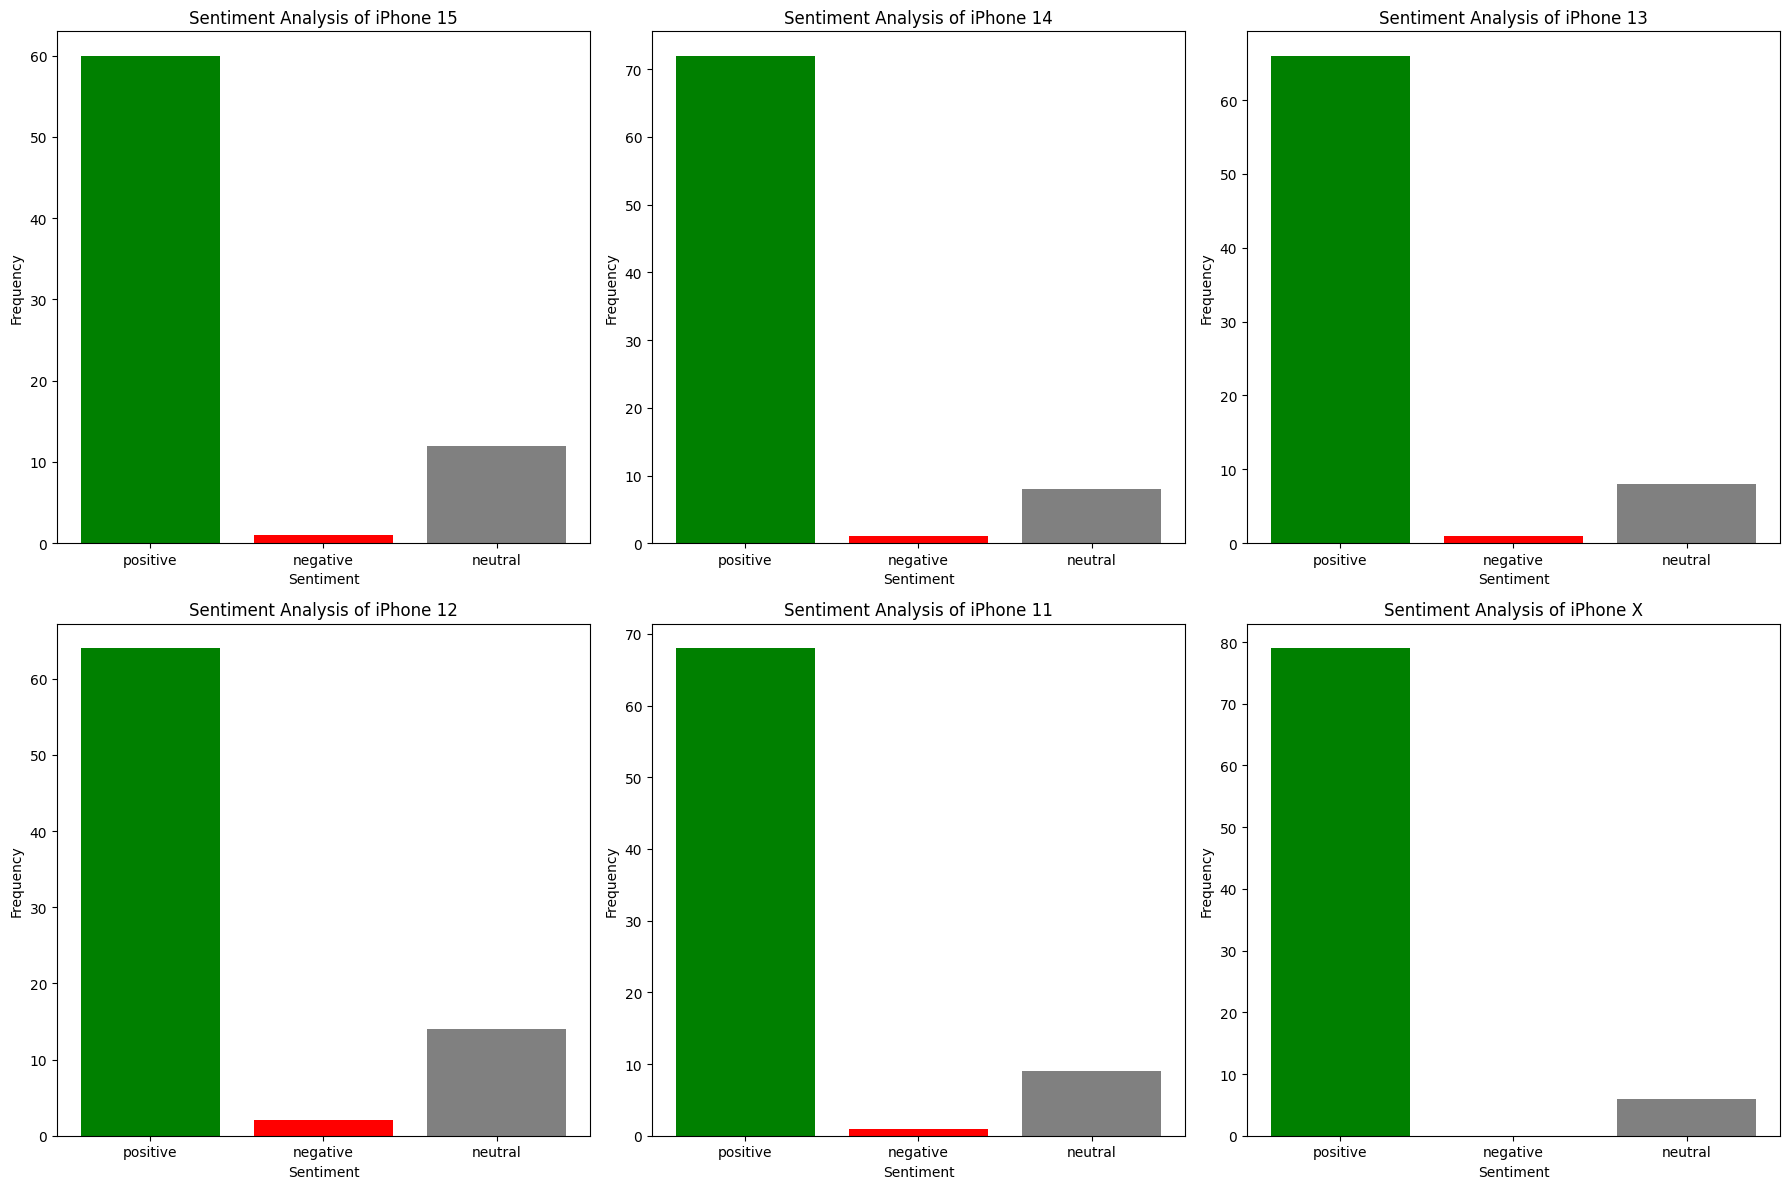

In [1]:
# @title #Sentiment Analysis of iPhone News ver 4

import random
import requests
from googlesearch import search
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Function to extract content from the URL
def get_full_article(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        article_text = ' '.join([p.get_text() for p in paragraphs])
        return article_text
    except Exception as e:
        print(f"Failed to fetch {url}: {e}")
        return ""

# Classify news sources based on the domain
def classify_news_source(url):
    domain = urlparse(url).netloc
    if 'cnn' in domain or 'bbc' in domain or 'nytimes' in domain or 'forbes' in domain:
        return 'mainstream'
    elif 'blogspot' in domain or 'wordpress' in domain:
        return 'private'
    else:
        return 'other'

# Extract news channel based on domain
def get_news_channel(url):
    domain = urlparse(url).netloc
    known_channels = ['cnn', 'bbc', 'nytimes', 'forbes', 'techcrunch', 'reuters']
    for channel in known_channels:
        if channel in domain:
            return channel
    return 'other'

# Define search query and extract news results
def search_iphone_news(iphone_version, release_date, result_count=100):
    search_query = f"{iphone_version} review OR news OR release after:{release_date}"

    # Perform Google Search (results are URLs)
    search_results = list(search(search_query, num=100, stop=100))

    # Check if enough results are available
    if len(search_results) < result_count:
        print(f"Warning: Only {len(search_results)} articles found for {iphone_version}.")

    # Randomly select available news results
    random_results = random.sample(search_results, min(result_count, len(search_results)))

    # Fetch full articles and track metadata
    articles_data = []
    for url in random_results:
        article_text = get_full_article(url)
        if article_text:
            news_source = classify_news_source(url)
            news_channel = get_news_channel(url)
            articles_data.append({'url': url, 'text': article_text, 'source': news_source, 'channel': news_channel})

    return articles_data

# Sentiment analysis using TextBlob
def analyze_sentiment(news_text):
    blob = TextBlob(news_text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Analyze the sentiment of the news articles
def analyze_news_articles(news_articles):
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}
    sentiment_scores = []

    for article in news_articles:
        if article['text']:  # Ensure the article has content
            sentiment = analyze_sentiment(article['text'])
            sentiments[sentiment] += 1
            sentiment_scores.append(TextBlob(article['text']).sentiment.polarity)

    return sentiments, sentiment_scores

# Print sentiment counts, scores, and URLs
def print_sentiment_details(sentiments, sentiment_scores, news_articles, iphone_version):
    print(f"\nSentiment counts for {iphone_version}:")
    for sentiment_type, count in sentiments.items():
        print(f"{sentiment_type}: {count}")

    print(f"\nSentiment scores for {iphone_version}:")
    for i, score in enumerate(sentiment_scores):
        print(f"Article {i+1}: Polarity Score = {score}, URL: {news_articles[i]['url']}, Source: {news_articles[i]['source']}, Channel: {news_articles[i]['channel']}")

# Plot all bar charts in a 3-column layout
def plot_all_sentiments(sentiment_data):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))

    iphone_versions = list(sentiment_data.keys())

    for i, (iphone_version, data) in enumerate(sentiment_data.items()):
        sentiments = data['sentiments']
        labels = list(sentiments.keys())
        values = list(sentiments.values())

        row, col = divmod(i, 3)  # For 2 rows and 3 columns layout
        axs[row, col].bar(labels, values, color=['green', 'red', 'gray'])
        axs[row, col].set_title(f'Sentiment Analysis of {iphone_version}')
        axs[row, col].set_xlabel('Sentiment')
        axs[row, col].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Define the iPhone versions and their release dates
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13", "iPhone 12", "iPhone 11", "iPhone X"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01", "2021-09-01", "2020-09-01", "2017-09-01"]

    # Dictionary to store sentiment data for each iPhone version
    sentiment_data = {}

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        print(f"Fetching news articles for {iphone_version}...")

        # Fetch news articles and categorize sources
        news_articles = search_iphone_news(iphone_version, release_date)

        # Double-check the count of articles
        if len(news_articles) < 100:
            print(f"Only {len(news_articles)} articles fetched for {iphone_version}.")

        # Perform sentiment analysis and store the results
        sentiments, sentiment_scores = analyze_news_articles(news_articles)

        # Print sentiment details (counts, scores, and URLs)
        print_sentiment_details(sentiments, sentiment_scores, news_articles, iphone_version)

        # Store sentiment counts and scores for plotting
        sentiment_data[iphone_version] = {'sentiments': sentiments, 'scores': sentiment_scores}

    # Plot all sentiments in a 3-column layout
    plot_all_sentiments(sentiment_data)


Fetching news articles for iPhone 15...
Only 72 articles fetched for iPhone 15.

Sentiment counts for iPhone 15:
positive: 58
negative: 1
neutral: 13

Sentiment scores for iPhone 15:
Article 1: Polarity Score = 0.19455171890815467, URL: https://www.zdnet.com/article/iphone-15-plus-review/#toc-link-3-9fe94cda-986f-4886-a1b6-f4f90672fa33, Source: other, Channel: other
Article 2: Polarity Score = 0.19455171890815467, URL: https://www.zdnet.com/article/iphone-15-plus-review/, Source: other, Channel: other
Article 3: Polarity Score = 0.35011381610813425, URL: https://www.amazon.com/Apple-iPhone-15-Pro-Max/dp/B0CMZD7VCV, Source: other, Channel: other
Article 4: Polarity Score = 0.19056750541125542, URL: https://bgr.com/guides/iphone-16-everything-we-know/, Source: other, Channel: other
Article 5: Polarity Score = 0.0, URL: https://www.apple.com/iphone/compare/?modelList=iphone-16-pro,iphone-15-pro, Source: other, Channel: other
Article 6: Polarity Score = 0.3064701686303628, URL: https://www

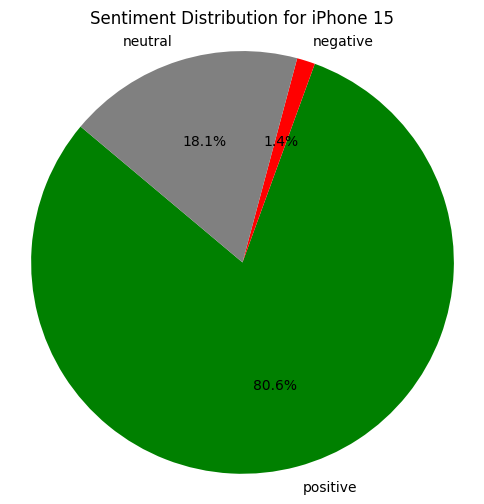

Fetching news articles for iPhone 14...
Only 82 articles fetched for iPhone 14.

Sentiment counts for iPhone 14:
positive: 71
negative: 2
neutral: 9

Sentiment scores for iPhone 14:
Article 1: Polarity Score = 0.1016835016835017, URL: https://www.verizon.com/smartphones/apple-iphone-14-plus/, Source: other, Channel: other
Article 2: Polarity Score = 0.15676406926406927, URL: https://www.gsmarena.com/apple_iphone_14_plus-11862.php, Source: other, Channel: other
Article 3: Polarity Score = 0.19455171890815467, URL: https://www.zdnet.com/article/iphone-15-plus-review/, Source: other, Channel: other
Article 4: Polarity Score = 0.18705244408369412, URL: https://www.deccanherald.com/technology/apple-ios-18-set-for-release-next-week-list-of-iphones-eligible-for-latest-update-3184628, Source: other, Channel: other
Article 5: Polarity Score = 0.12389241963710049, URL: https://www.tomsguide.com/phones/iphones/iphone-16-just-made-the-iphone-16-pro-look-pointless-heres-why, Source: other, Channel:

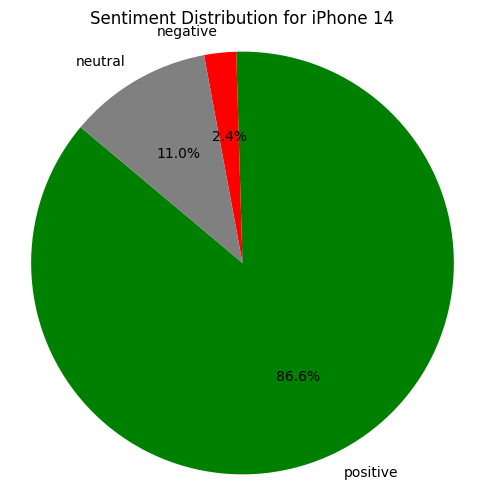

Fetching news articles for iPhone 13...
Only 80 articles fetched for iPhone 13.

Sentiment counts for iPhone 13:
positive: 72
negative: 1
neutral: 7

Sentiment scores for iPhone 13:
Article 1: Polarity Score = 0.20015566378066374, URL: https://www.tomsguide.com/reviews/iphone-13, Source: other, Channel: other
Article 2: Polarity Score = 0.10449982569460715, URL: https://news.ycombinator.com/item?id=41491896, Source: other, Channel: other
Article 3: Polarity Score = 0.10393594500737356, URL: https://en.wikipedia.org/wiki/IPhone_13_Pro, Source: other, Channel: other
Article 4: Polarity Score = 0.12251082251082251, URL: https://en.wikipedia.org/wiki/IPhone_13, Source: other, Channel: other
Article 5: Polarity Score = 0.07788474445451189, URL: https://www.yahoo.com/tech/apple-officially-discontinued-three-iphones-150844446.html, Source: other, Channel: other
Article 6: Polarity Score = 0.0, URL: https://www.financialexpress.com/life/technology-iphone-13-long-term-review-four-things-i-like-

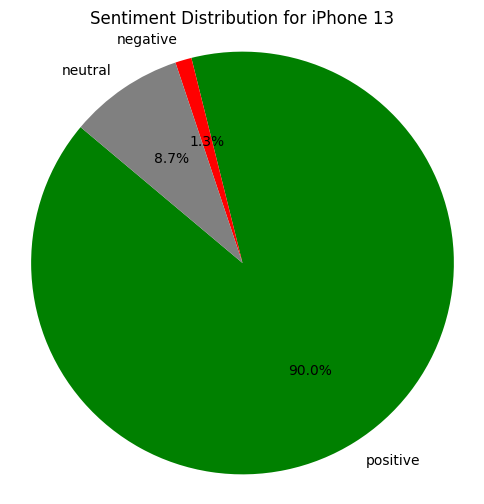

Fetching news articles for iPhone 12...


In [ ]:
#@title pie chart version
import random
import requests
from googlesearch import search
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Function to extract content from the URL
def get_full_article(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        article_text = ' '.join([p.get_text() for p in paragraphs])
        return article_text
    except Exception as e:
        print(f"Failed to fetch {url}: {e}")
        return ""

# Classify news sources based on the domain
def classify_news_source(url):
    domain = urlparse(url).netloc
    if 'cnn' in domain or 'bbc' in domain or 'nytimes' in domain or 'forbes' in domain:
        return 'mainstream'
    elif 'blogspot' in domain or 'wordpress' in domain:
        return 'private'
    else:
        return 'other'

# Extract news channel based on domain
def get_news_channel(url):
    domain = urlparse(url).netloc
    known_channels = ['cnn', 'bbc', 'nytimes', 'forbes', 'techcrunch', 'reuters']
    for channel in known_channels:
        if channel in domain:
            return channel
    return 'other'

# Define search query and extract news results
def search_iphone_news(iphone_version, release_date, result_count=100):
    search_query = f"{iphone_version} review OR news OR release after:{release_date}"

    # Perform Google Search (results are URLs)
    search_results = list(search(search_query, num=100, stop=100))

    # Check if enough results are available
    if len(search_results) < result_count:
        print(f"Warning: Only {len(search_results)} articles found for {iphone_version}.")

    # Randomly select available news results
    random_results = random.sample(search_results, min(result_count, len(search_results)))

    # Fetch full articles and track metadata
    articles_data = []
    for url in random_results:
        article_text = get_full_article(url)
        if article_text:
            news_source = classify_news_source(url)
            news_channel = get_news_channel(url)
            articles_data.append({'url': url, 'text': article_text, 'source': news_source, 'channel': news_channel})

    return articles_data

# Sentiment analysis using TextBlob
def analyze_sentiment(news_text):
    blob = TextBlob(news_text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Analyze the sentiment of the news articles
def analyze_news_articles(news_articles):
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}
    sentiment_scores = []

    for article in news_articles:
        if article['text']:  # Ensure the article has content
            sentiment = analyze_sentiment(article['text'])
            sentiments[sentiment] += 1
            sentiment_scores.append(TextBlob(article['text']).sentiment.polarity)

    return sentiments, sentiment_scores

# Print sentiment counts, scores, and URLs
def print_sentiment_details(sentiments, sentiment_scores, news_articles, iphone_version):
    print(f"\nSentiment counts for {iphone_version}:")
    for sentiment_type, count in sentiments.items():
        print(f"{sentiment_type}: {count}")

    print(f"\nSentiment scores for {iphone_version}:")
    for i, score in enumerate(sentiment_scores):
        print(f"Article {i+1}: Polarity Score = {score}, URL: {news_articles[i]['url']}, Source: {news_articles[i]['source']}, Channel: {news_articles[i]['channel']}")

# Plot all bar charts in a 3-column layout
def plot_all_sentiments(sentiment_data):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))

    iphone_versions = list(sentiment_data.keys())

    for i, (iphone_version, data) in enumerate(sentiment_data.items()):
        sentiments = data['sentiments']
        labels = list(sentiments.keys())
        values = list(sentiments.values())

        row, col = divmod(i, 3)  # For 2 rows and 3 columns layout
        axs[row, col].bar(labels, values, color=['green', 'red', 'gray'])
        axs[row, col].set_title(f'Sentiment Analysis of {iphone_version}')
        axs[row, col].set_xlabel('Sentiment')
        axs[row, col].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Function to plot a pie chart for sentiment distribution
def plot_sentiment_pie_chart(sentiments, iphone_version):
    labels = list(sentiments.keys())
    sizes = list(sentiments.values())
    colors = ['green', 'red', 'gray']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {iphone_version}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Define the iPhone versions and their release dates
    iphone_versions = ["iPhone 15", "iPhone 14", "iPhone 13", "iPhone 12", "iPhone 11", "iPhone X"]
    release_dates = ["2024-09-01", "2023-09-01", "2022-09-01", "2021-09-01", "2020-09-01", "2017-09-01"]

    # Dictionary to store sentiment data for each iPhone version
    sentiment_data = {}

    for iphone_version, release_date in zip(iphone_versions, release_dates):
        print(f"Fetching news articles for {iphone_version}...")

        # Fetch news articles and categorize sources
        news_articles = search_iphone_news(iphone_version, release_date)

        # Double-check the count of articles
        if len(news_articles) < 100:
            print(f"Only {len(news_articles)} articles fetched for {iphone_version}.")

        # Perform sentiment analysis and store the results
        sentiments, sentiment_scores = analyze_news_articles(news_articles)

        # Print sentiment details (counts, scores, and URLs)
        print_sentiment_details(sentiments, sentiment_scores, news_articles, iphone_version)

        # Store sentiment counts and scores for plotting
        sentiment_data[iphone_version] = {'sentiments': sentiments, 'scores': sentiment_scores}

        # Plot sentiment distribution as pie chart
        plot_sentiment_pie_chart(sentiments, iphone_version)

    # Plot all sentiments in a 3-column layout
    plot_all_sentiments(sentiment_data)


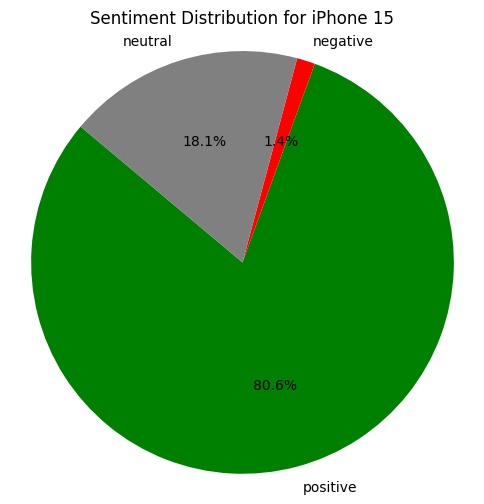

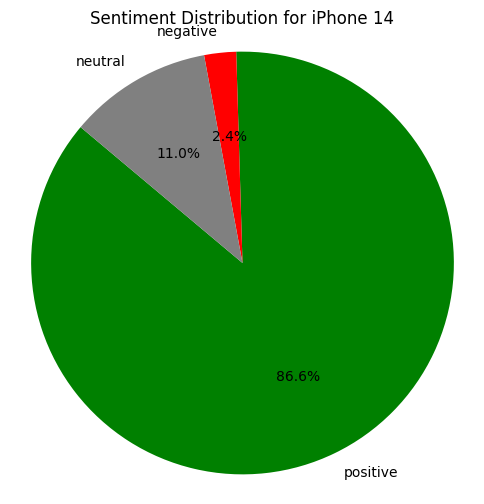

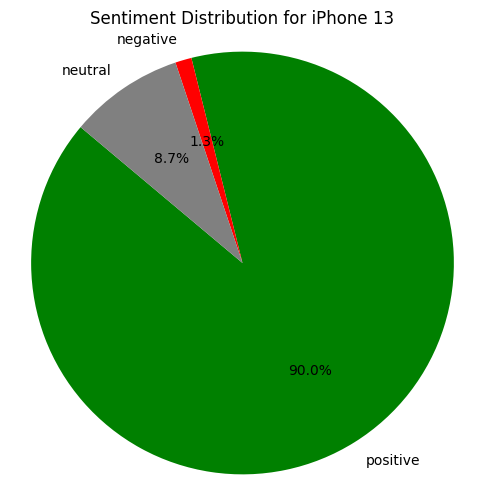